# EXPLORING DATA

This section is structured as follows:
1. [Tweets 2019](#1-tweets2019)
    1. [Introduction](#11-introduction)
    2. [Full text](#12-full-text)
    3. [Number of likes](#13-number-of-likes)
    4. [Number of replies](#14-number-of-replies)
    5. [Number of retweets](#15-number-of-retweets)
    6. [Location](#16-location)
2. [Tweets 2019-2022](#2-tweets-2019-2022)
    1. [introduction](#21-introduction)
    2. [full text](#22-full-text)
    3. [Time](#23-time)
    4. [Keywords](#24-keyword)

## 1. Tweets2019

### 1.1. Introduction

In [66]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist
import random
import re
import plotly.express as px
import plotly.graph_objects as go


plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_2019 = pd.read_csv('https://media.githubusercontent.com/media/GDLPLearning/Sentiment-Analysis-for-the-MDP/master/notebooks/Exploratory/data/2019.csv') # read the csv file

In [3]:
df_2019.shape # shows the number of rows and columns

(17698, 9)

In [4]:
df_2019.info() # shows the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   full_text        17698 non-null  object
 1   user             17698 non-null  object
 2   location         17698 non-null  object
 3   date             17698 non-null  object
 4   tweet_id         17698 non-null  int64 
 5   number_rt        17698 non-null  int64 
 6   number_likes     17698 non-null  int64 
 7   number_reply     17698 non-null  int64 
 8   conversation_id  17698 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [5]:
df_2019.describe() # shows the mean, std, min, max, etc. of each column

,tweet_id,number_rt,number_likes,number_reply,conversation_id
count,1.769800e+04,17698.000000,17698.000000,17698.000000,1.769800e+04
mean,1.147017e+18,2.145101,7.685614,0.606848,1.146736e+18
std,3.824295e+16,25.705813,97.046305,7.947419,3.908216e+16
min,1.083115e+18,0.000000,0.000000,0.000000,6.265645e+17
25%,1.111778e+18,0.000000,0.000000,0.000000,1.111776e+18
50%,1.145119e+18,0.000000,0.000000,0.000000,1.145118e+18
75%,1.178459e+18,0.000000,2.000000,0.000000,1.178457e+18
max,1.244776e+18,1650.000000,6946.000000,794.000000,1.244776e+18


In [6]:
data_2019=df_2019[['full_text','location','number_rt','number_likes','number_reply']]
data_2019.to_csv('data/2019_processed.csv',index=False)

### 1.2. Full text

In [7]:
data_2019['full_text'].str.len().describe()

count    17698.000000
mean       142.696293
std         79.503198
min          7.000000
25%         77.000000
50%        126.000000
75%        208.000000
max        689.000000
Name: full_text, dtype: float64

In [8]:
full_text_char = data_2019['full_text'].str.len()

In [9]:
print(full_text_char.quantile(0.05))
print(full_text_char.quantile(0.25))
print(full_text_char.quantile(0.5))
print(full_text_char.quantile(0.75))
print(full_text_char.quantile(0.95))

37.0
77.0
126.0
208.0
278.0


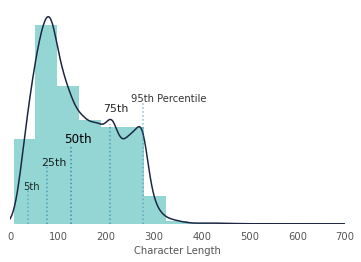

In [10]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_char.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

# Plot KDE
full_text_char.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_char.quantile(0.05), full_text_char.quantile(0.25), full_text_char.quantile(0.5), full_text_char.quantile(0.75), full_text_char.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-10, 0.001, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-13, 0.0017, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-13, 0.0024, "50th", size = 12, alpha = 1)
ax.text(quant_75-13, 0.0033, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-25, 0.0036, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Character Length",size = 10) 
ax.set_xlim(0, 700)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

In [11]:
full_text_words=df_2019['full_text'].str.split().str.len()

In [12]:
full_text_words.describe()

count    17698.000000
mean        21.930105
std         12.619929
min          1.000000
25%         12.000000
50%         19.000000
75%         31.000000
max         75.000000
Name: full_text, dtype: float64

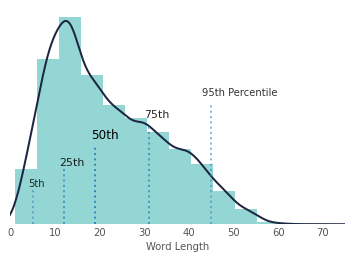

In [13]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_words.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

#kde
full_text_words.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_words.quantile(0.05), full_text_words.quantile(0.25), full_text_words.quantile(0.5), full_text_words.quantile(0.75), full_text_words.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-1, 0.007, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-1, 0.011, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-1, 0.016, "50th", size = 12, alpha = 1)
ax.text(quant_75-1, 0.020, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-2, 0.024, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Word Length",size = 10) 
ax.set_xlim(0, 75)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

In [14]:
data_2019['num_words']=full_text_words
data_2019['num_char']=full_text_char

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_1833/1918683245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['num_words']=full_text_words
/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_1833/1918683245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['num_char']=full_text_char


In [15]:
data_2019['num_words'].value_counts().reset_index().sort_values(by='index',ascending=False) # shows the number of words in each tweet

,index,num_words
64,75,1
63,69,1
65,67,1
62,65,1
59,62,3
...,...,...
24,5,323
31,4,277
42,3,163
46,2,123


In [16]:
data_2019[['full_text','num_words']][data_2019['num_words']<=2].sort_values(by='num_words').sample(10, random_state=6)

,full_text,num_words
8218,@from__oz Medellín,2
3254,@SaqueLargoWin Medellín,2
7731,@Ricardo_Arjona Medellín,2
9375,@BillieEilishCOL Medellín,2
10915,Medellín 😍,2
3327,@SaqueLargoWin Medellín,2
10308,Medellín!!!! 😘,2
1537,"Medellín, Extremadura",2
11764,Medellín.,1
11466,😍 Medellín,2


In [17]:
data_2019[['full_text','num_words']][data_2019['num_words']<=2].sort_values(by='num_words').sample(10) # shows the tweets with 75 words or 1 word

,full_text,num_words
7785,@albertdmcat Medellín...,2
8072,MUNDOPARLANTE MEDELLIN,2
575,@Andregirlbella Medellín,2
8600,Muy preocupante,2
16729,Visualizando Medellín.,2
9813,@CarolinaSllb Medellín,2
3345,@SaqueLargoWin Medellín,2
8009,Medellín 😎,2
8070,MUNDOPARLANTE MEDELLIN,2
9929,"*Aranjuez, Medellín",2


In [18]:
data_2019.loc[8374,'full_text'] # shows the tweet with the index 8374

' @Alex881490101 @Ceballitos1 @ramirezdo @Angeljosew1 @RadicalEd @lilipiedadvalle @LAPacifiKA @LeilaChujfi @SerHRodriguez @ANNALVAREZG @MiremosaVer @juancadelgado @gener_usuga @MonoMeLlaman @edywfernandez @JAtecor @merv59 @JUANCAELBROKY @ClavijoAndres83 @Marianiniecheve @JohaFuentes @gurozu @MauricioGalin11 @LaMamert4 @DIDASKALOSW @InTweetiva @lbertoortiz @mauronuma @DanielSamperO @Julianaramirez6 @AlvaroUribeVel Esos uribeños que reciclan todo lo que dice su amo me hacen reír mucho. Es como hablar con un lorito. «Angelito quiere cacao» jajajajajaja Debería seguir lavando baños y no perder el tiempo defendiendo a un narcoterrorista excartel de Medellín. Un abrazo a todos!'

In [19]:
list=[65,67,69,75]
data_large=data_2019[['full_text','num_words']][(data_2019['num_words']).isin(list)].sort_values(by='num_words') # shows the tweets with the words 65, 67, 69

In [20]:
data_large

,full_text,num_words
15969,@baloncentralofi @MillosDColombia @Millonario...,65
3989,@transmetrobaq @UTSistur @pabvic1 @AMBQuilla ...,67
4809,@HerliRodriguez2 @CarrillonavasG @indignada20...,69
8374,@Alex881490101 @Ceballitos1 @ramirezdo @Angel...,75


In [21]:
print(data_large.iloc[0,0],"\n"+"-"*20,data_large.iloc[1,0],"\n"+"-"*20,data_large.iloc[2,0],"\n"+"-"*20,data_large.iloc[3,0])

 @baloncentralofi @MillosDColombia @MillonariosEste @acordellat @AficionColombia @CuyigansPasto @ConRola @Elyorkalvarez @nixoncarranza Así quedan los 8, el Once tiene buena diferencia de gol y el 9, 10 y 11 tienen partidos muy duros, difícil que sumen los 6, inclusive si esos 3 pierden entre semana ya quedan definidos los 8, a Medellín le tocaría ganar los dos partidos y esperar que el Once no sume en Sta Marta. 
--------------------  @transmetrobaq @UTSistur @pabvic1 @AMBQuilla @Metrocaribe @OperadorUno1 @luchovoltios @SOBUSA_SA @AtlanticoEmi @jorgecura1070 @CaracolBquilla @HENRYFOREROJ @ExtraNoticiasCo Ajá que culpa tengo yo sí así es la historia del metro Medellín. Aún así si fuera como me dices, digamos q sostiene, porque los metros q tienen más de 20 años y los metroplus q tienen casi la misma edad q los de bquilla, los de TM se ven acabados? Responda! Y estaciones 
--------------------  @HerliRodriguez2 @CarrillonavasG @indignada2016 @patriciam265 @paula30202449 @Setulus1 @Malupr

In [22]:
# import shape for our word cloud
char_mask = np.array(Image.open('figures/twitter.png'))

# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        contour_color="#1C2541",
                        contour_width=3,
                        max_words=2000).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()

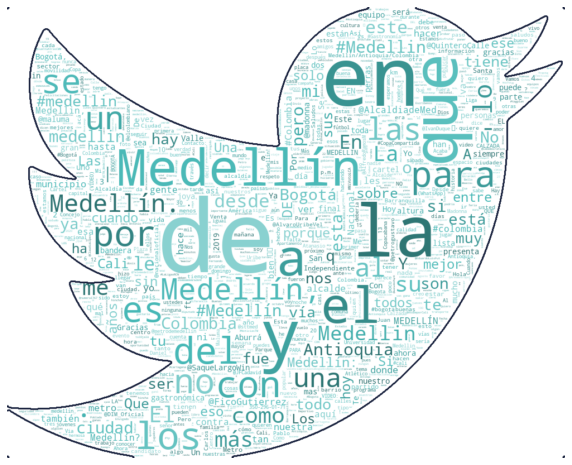

In [23]:
word_tweet_cloud=[]
for tweet in data_2019['full_text']:
    for words in tweet.split():
        word_tweet_cloud.append(words)
word_fre = FreqDist(word_tweet_cloud)
plot_word_cloud(char_mask, word_fre)

In [24]:
word_fre.most_common(30)

[('de', 19476),
 ('en', 12652),
 ('la', 9478),
 ('y', 8241),
 ('que', 7226),
 ('Medellín', 7177),
 ('a', 7169),
 ('el', 7073),
 ('los', 3381),
 ('del', 3251),
 ('con', 3155),
 ('por', 3010),
 ('para', 2990),
 ('es', 2859),
 ('no', 2719),
 ('se', 2604),
 ('un', 2415),
 ('las', 2151),
 ('Medellín,', 2031),
 ('una', 1683),
 ('al', 1599),
 ('lo', 1507),
 ('.', 1487),
 ('Medellín.', 1374),
 ('-', 1191),
 ('El', 1142),
 ('su', 1118),
 ('como', 1114),
 ('me', 1114),
 ('más', 1076)]

In [25]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df_words = pd.DataFrame.from_dict(dict_to_df)
df_words=df_words.sort_values(by='frequency',ascending=False).head(30).sort_values(by='frequency',ascending=True)
df_words

,word,frequency
464,más,1076
394,me,1114
72,como,1114
149,su,1118
138,El,1142
271,-,1191
140,Medellín.,1374
528,.,1487
726,lo,1507
534,al,1599


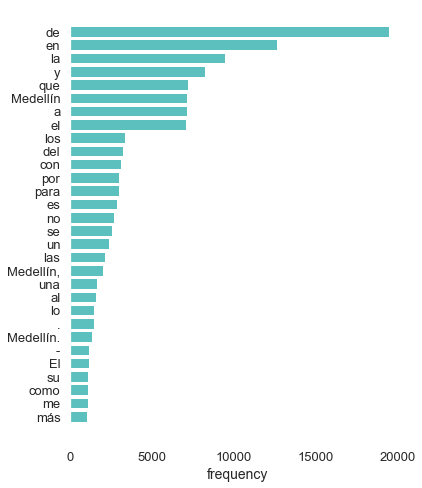

In [26]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(df_words.word, df_words.frequency,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

### 1.3. Number of likes

In [27]:
data_2019.sort_values(by='number_likes',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,location,number_rt,number_likes,number_reply,num_words,num_char
11050,Alejandro Gómez @AlejandroGL2014 es médico y ...,"Bogotá, D.C., Colombia",821,6946,369,45,280
16498,Miren la diferencia entre una estación de Tra...,"Bogotá, D.C., Colombia",1650,4283,794,28,174
14388,Nuestra respuesta ante el odio y la homofobia...,"Sahagún, Colombia",781,3953,87,18,113
1278,"""Todos debemos tratarnos con amor"": el padre ...","Santa Marta, Colombia",1129,3934,86,21,134
14266,Quiero una camisa con esta foto. Pareja de ha...,"Sahagún, Colombia",297,3355,21,17,100
...,...,...,...,...,...,...,...
7490,@AlvaroUribeVel Ese al que no le gustan los t...,"Medellín, Colombia",0,0,0,14,81
7492,Esta Sonando....Madonna - Medellín...... en e...,"Medellín, Colombia",0,0,0,16,132
7493,GOBERNACIÓN DE ANTIOQUIA: FIRMA PARA QUE EL T...,"Medellín, Colombia",0,0,0,26,154
7494,You Are Always On My Mind - #ElvisPresley #Es...,"Medellín, Colombia",1,0,0,25,242


In [28]:
data_2019.loc[11050,"full_text"] # shows the first tweet

' Alejandro Gómez @AlejandroGL2014 es médico y especialista en salud y finanzas de EAFIT. Fue director de Salud Pública en Medellín, gerente de la red hospitalaria de esa ciudad, y Director Nacional de Nutrición del ICBF y será el nuevo Secretario de Salud de Bogotá. #BogotáCambia'

### 1.4. Number of replies

In [29]:
data_2019.sort_values(by='number_reply',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,location,number_rt,number_likes,number_reply,num_words,num_char
16498,Miren la diferencia entre una estación de Tra...,"Bogotá, D.C., Colombia",1650,4283,794,28,174
11050,Alejandro Gómez @AlejandroGL2014 es médico y ...,"Bogotá, D.C., Colombia",821,6946,369,45,280
8864,En Medellín se avecina un cambio en la políti...,"Yopal, Colombia",471,1494,224,36,244
14589,Este es el hombre señalado de destruir la ban...,"Sahagún, Colombia",38,134,211,13,74
6807,La falta que nos ha hecho en Bogotá tener el ...,"Retiro, Colombia",1149,2546,211,18,104
...,...,...,...,...,...,...,...
6501,@comicconcol me traen a Maisie Williams pa la...,"Retiro, Colombia",0,0,0,18,94
6502,#Conductor que #arrolló #varias personas en M...,"Retiro, Colombia",0,0,0,10,70
6503,En Medellín Cesar Pérez Gutierrez @GobAntioqu...,"Retiro, Colombia",0,0,0,45,279
6504,Durante la segunda mesa de trabajo del progra...,"Retiro, Colombia",0,0,0,34,246


In [30]:
data_2019.loc[16498,"full_text"] # shows the first tweet

' Miren la diferencia entre una estación de Transmilenio Bogotá y otra de Metroplus (el Transmilenio de Medellín). El problema no es el tamaño de la estación... ....es cultura'

### 1.5. Number of retweets

In [31]:
data_2019.sort_values(by='number_rt',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,location,number_rt,number_likes,number_reply,num_words,num_char
16498,Miren la diferencia entre una estación de Tra...,"Bogotá, D.C., Colombia",1650,4283,794,28,174
6807,La falta que nos ha hecho en Bogotá tener el ...,"Retiro, Colombia",1149,2546,211,18,104
1278,"""Todos debemos tratarnos con amor"": el padre ...","Santa Marta, Colombia",1129,3934,86,21,134
1272,Pájaroterapia Paisa.. Medellín.,"Santa Marta, Colombia",1048,3122,29,3,32
11050,Alejandro Gómez @AlejandroGL2014 es médico y ...,"Bogotá, D.C., Colombia",821,6946,369,45,280
...,...,...,...,...,...,...,...
6605,#Alerta La Chiva #Medellín: A ESTA HORA LAS A...,"Retiro, Colombia",0,0,2,21,168
6607,@Fedeortizv Acá en Medellín 32,"Retiro, Colombia",0,1,0,5,31
6608,Servicio Social en Medellín.,"Retiro, Colombia",0,0,0,4,29
6609,@GrinColombia como quieren que uno use las sc...,"Retiro, Colombia",0,0,0,21,122


In [32]:
data_2019.loc[6807,"full_text"] # shows the first tweet']

' La falta que nos ha hecho en Bogotá tener el sentido de política pública de Medellín es incuestionable.'

### 1.6. Location

In [33]:
location_tweets=data_2019['location'] # shows the tweets with a location

In [34]:
data_location=location_tweets.groupby(location_tweets).size().reset_index(name="counts").sort_values(by="counts") # shows the number of tweets with each location
data_location

,location,counts
7,"Montería, Colombia",485
12,"Valledupar, Colombia",488
6,"Monterrey, Nuevo León",489
14,"Yopal, Colombia",489
0,"Arequipa, Peru",490
9,"Sahagún, Colombia",490
13,"Yalí, Colombia",491
4,"Candelaria, Colombia",492
8,"Retiro, Colombia",493
11,"Táchira, Venezuela",494


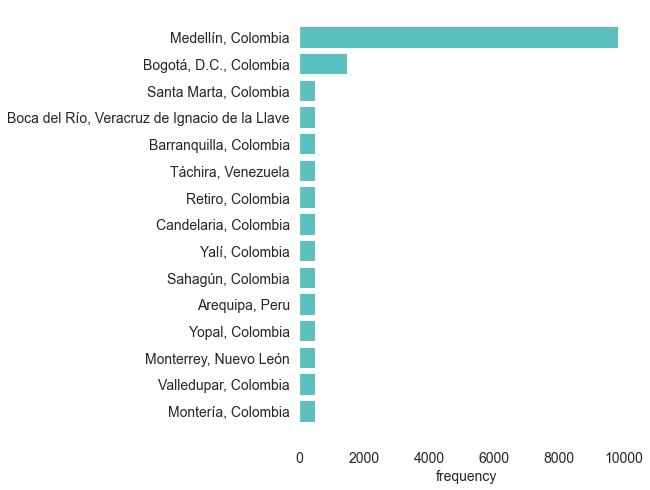

In [35]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(data_location.location, data_location.counts,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=14)


 
# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

In [36]:
data_2019[data_2019['location']=='Arequipa, Peru'].values[1]

array([' Ahora que acaban de meternos 3 pepas, con Guerrero incluíso, voy a destapar un Medellín y prepararme un cuba mientras escucho a Janis. Que tengan buenas noches.',
       'Arequipa, Peru', 0, 1, 0, 27, 161], dtype=object)

In [37]:
data_2019.to_csv('data/2019_interim.csv',index=False)

## 2. Tweets 2019-2022

### 2.1. Introduction

In [38]:
df_tweets=pd.read_csv('https://media.githubusercontent.com/media/GDLPLearning/Sentiment-Analysis-for-the-MDP/master/notebooks/Exploratory/data/tweets.csv')

In [39]:
df_tweets.head()

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word
0,0,Me acordé que a los colombianos de mi ex trab...,itslilysa,"Andes, Colombia",2020-01-10 22:51:09+00:00,1215768064697999362,0,0,0,1215768064697999362,8,trabajo
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,LuzMarinaVelsq5,"Andes, Colombia",2020-01-10 22:06:30+00:00,1215756830246428672,0,1,0,1215743967326801922,8,trabajo
2,2,En Tierragro sabemos que la labor en el campo...,TIERRAGRO,"Andes, Colombia",2020-01-10 19:59:40+00:00,1215724912960294917,1,1,0,1215724912960294917,8,trabajo
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,3puntospublicid,"Andes, Colombia",2020-01-10 19:17:54+00:00,1215714400289677313,0,0,0,1214949391913684998,8,trabajo
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,HMadrid911,"Andes, Colombia",2020-01-10 18:09:24+00:00,1215697162471989248,0,1,1,1215388060294287361,8,trabajo


In [40]:
df_tweets.shape

(244502, 12)

In [41]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244502 entries, 0 to 244501
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       244502 non-null  int64 
 1   full_text        244502 non-null  object
 2   user             244502 non-null  object
 3   location         244502 non-null  object
 4   date             244502 non-null  object
 5   tweet_id         244502 non-null  int64 
 6   number_rt        244502 non-null  int64 
 7   number_likes     244502 non-null  int64 
 8   number_reply     244502 non-null  int64 
 9   conversation_id  244502 non-null  int64 
 10  id_key_word      244502 non-null  int64 
 11  key_word         244502 non-null  object
dtypes: int64(7), object(5)
memory usage: 22.4+ MB


In [42]:
df_tweets.describe()

,Unnamed: 0,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word
count,244502.000000,2.445020e+05,244502.000000,244502.000000,244502.000000,2.445020e+05,244502.000000
mean,122250.500000,1.305647e+18,5.253282,15.979550,1.311777,1.305173e+18,5.480581
std,70581.792096,1.339278e+17,67.567581,237.782893,19.662006,1.344524e+17,2.705087
min,0.000000,1.079890e+18,0.000000,0.000000,0.000000,6.746151e+09,1.000000
25%,61125.250000,1.187798e+18,0.000000,0.000000,0.000000,1.187554e+18,3.000000
50%,122250.500000,1.297962e+18,0.000000,1.000000,0.000000,1.297586e+18,5.000000
75%,183375.750000,1.426530e+18,1.000000,4.000000,1.000000,1.426228e+18,8.000000
max,244501.000000,1.531424e+18,13921.000000,63276.000000,3655.000000,1.531424e+18,9.000000


In [43]:
data_tweets=df_tweets[['full_text','date','key_word']]
data_tweets.to_csv('data/tweets_processed.csv',index=False)

### 2.2. Full text

In [44]:
full_text_char=data_tweets['full_text'].str.len()
full_text_words=data_tweets['full_text'].str.split().str.len()

66.0
134.0
209.0
263.0
297.0


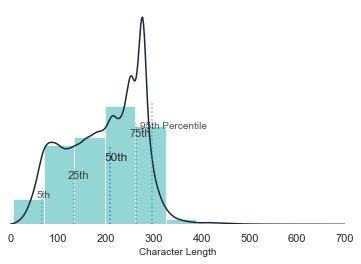

In [45]:
print(full_text_char.quantile(0.05))
print(full_text_char.quantile(0.25))
print(full_text_char.quantile(0.5))
print(full_text_char.quantile(0.75))
print(full_text_char.quantile(0.95))
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_char.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

# Plot KDE
full_text_char.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_char.quantile(0.05), full_text_char.quantile(0.25), full_text_char.quantile(0.5), full_text_char.quantile(0.75), full_text_char.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-10, 0.001, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-13, 0.0017, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-13, 0.0024, "50th", size = 12, alpha = 1)
ax.text(quant_75-13, 0.0033, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-25, 0.0036, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Character Length",size = 10) 
ax.set_xlim(0, 700)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()


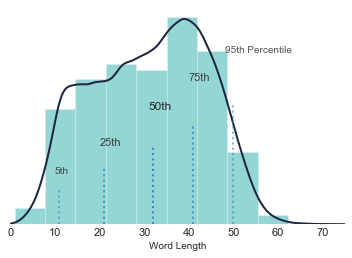

In [46]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_words.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

#kde
full_text_words.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_words.quantile(0.05), full_text_words.quantile(0.25), full_text_words.quantile(0.5), full_text_words.quantile(0.75), full_text_words.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-1, 0.007, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-1, 0.011, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-1, 0.016, "50th", size = 12, alpha = 1)
ax.text(quant_75-1, 0.020, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-2, 0.024, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Word Length",size = 10) 
ax.set_xlim(0, 75)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

In [47]:
# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        contour_color="#1C2541",
                        contour_width=3,
                        max_words=2000).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()


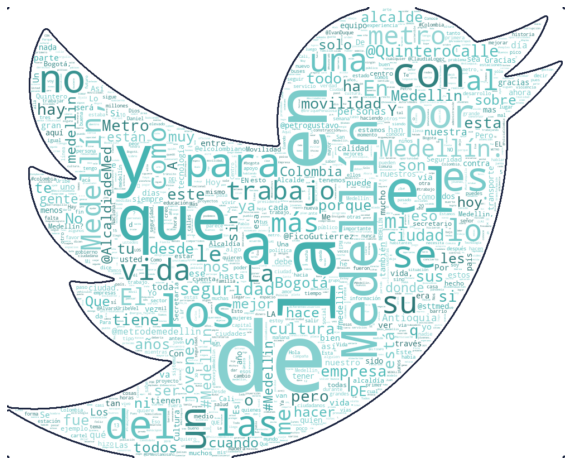

In [64]:
word_tweet_cloud=[]
for tweet in data_tweets['full_text']:
    for words in tweet.split():
        word_tweet_cloud.append(words)
word_fre = FreqDist(word_tweet_cloud)
plot_word_cloud(char_mask, word_fre)


In [49]:
word_fre.most_common(30)


[('de', 449494),
 ('la', 248277),
 ('en', 223301),
 ('y', 200303),
 ('que', 171656),
 ('el', 158748),
 ('a', 142510),
 ('Medellín', 109277),
 ('los', 81523),
 ('con', 70710),
 ('es', 67686),
 ('por', 67147),
 ('para', 66571),
 ('del', 64766),
 ('no', 62757),
 ('se', 58838),
 ('un', 56596),
 ('las', 51148),
 ('una', 41768),
 ('lo', 36086),
 ('su', 35539),
 ('vida', 33591),
 ('al', 29999),
 ('Medellín,', 29676),
 ('como', 26811),
 ('más', 26740),
 ('metro', 24893),
 ('trabajo', 24499),
 ('Medellín.', 22008),
 ('La', 21655)]

In [50]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df_words = pd.DataFrame.from_dict(dict_to_df)
df_words=df_words.sort_values(by='frequency',ascending=False).head(30).sort_values(by='frequency',ascending=True)
df_words


,word,frequency
243,La,21655
292,Medellín.,22008
9,trabajo,24499
7801,metro,24893
542,más,26740
142,como,26811
184,"Medellín,",29676
381,al,29999
7660,vida,33591
115,su,35539


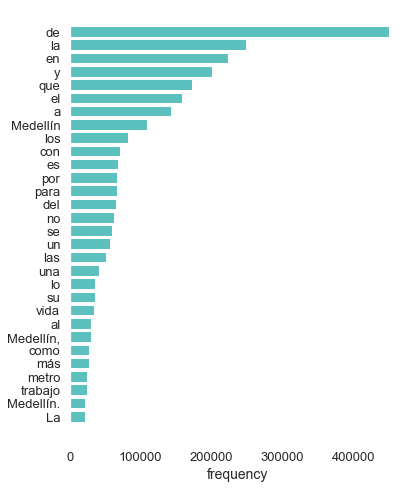

In [51]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(df_words.word, df_words.frequency,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

### 2.3 Time

In [52]:
data_tweets['day']=pd.to_datetime(data_tweets['date']).dt.day # creates a new column with the day of the week
data_tweets['month']=pd.to_datetime(data_tweets['date']).dt.month # creates a new column with the month of the tweet
data_tweets['year']=pd.to_datetime(data_tweets['date']).dt.year # creates a new column with the year
data_tweets['hour']=pd.to_datetime(data_tweets['date']).dt.hour # creates a new column with the hour of the day
data_tweets['day_of_week']=pd.to_datetime(data_tweets['date']).dt.dayofweek # creates a new column with the day of the week

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_1833/3883702319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets['day']=pd.to_datetime(data_tweets['date']).dt.day # creates a new column with the day of the week
/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_1833/3883702319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets['month']=pd.to_datetime(data_tweets['date']).dt.month # creates a new column with the month of the tweet
/var/folders/df/rgn2104s10v9n3b

In [53]:
data_tweet_day=data_tweets.groupby(['day']).size().reset_index(name="frequency").sort_values(by="day") # shows the number of tweets with each day of the week
data_tweet_month=data_tweets.groupby(['month']).size().reset_index(name="frequency").sort_values(by="month") # shows the number of tweets with each month of the year
data_tweet_year=data_tweets.groupby(['year']).size().reset_index(name="frequency").sort_values(by="year") # shows the number of tweets with each year
data_tweet_hour=data_tweets.groupby(['hour']).size().reset_index(name="frequency").sort_values(by="hour") # shows the number of tweets with each hour of the day
data_tweet_day_of_week=data_tweets.groupby(['day_of_week']).size().reset_index(name="frequency").sort_values(by="day_of_week") # shows the number of tweets with each day of the week
data_tweet_my=data_tweets.groupby(['month','year']).size().reset_index(name="frequency")
data_tweet_dmy=data_tweets.groupby(['day','month','year']).size().reset_index(name="frequency")


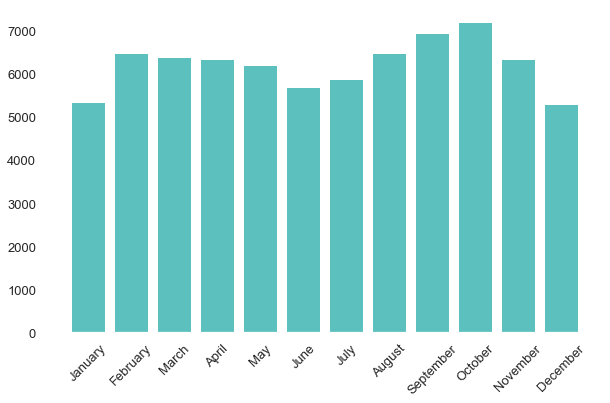

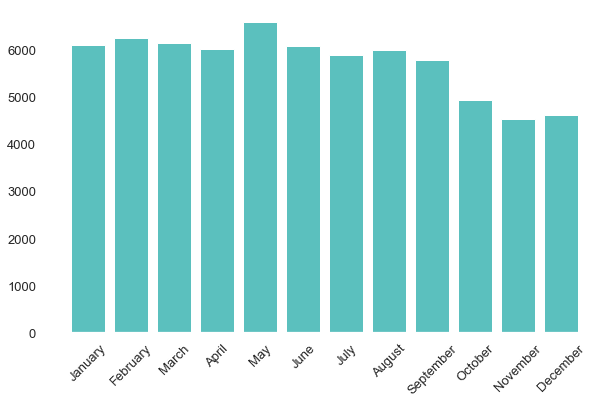

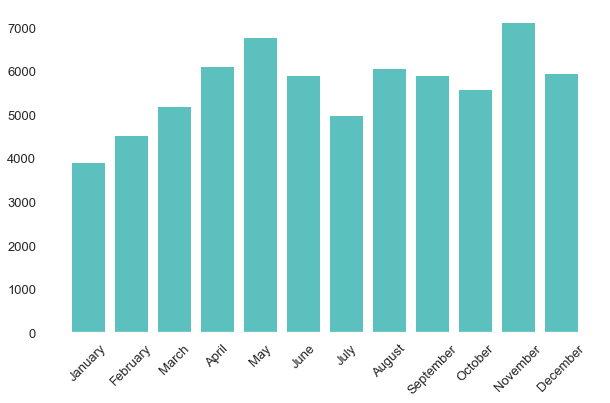

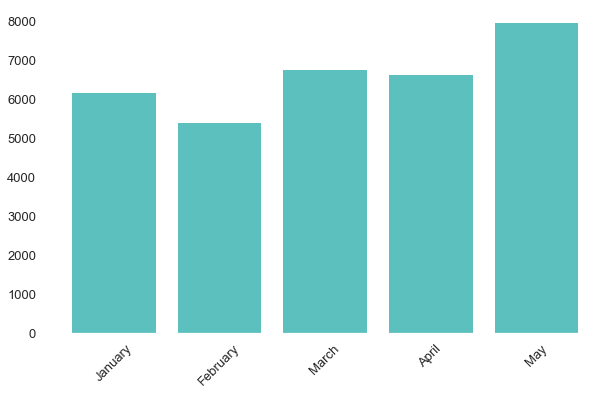

In [54]:
data_tweet_mypivot=pd.pivot_table(data_tweet_my,columns='year',values='frequency',index='month')
list_month=['January','February','March','April','May','June','July','August','September','October','November','December']
data_tweet_mypivot.index=list_month
#data_tweet_month['month']=list_month
for year in data_tweet_mypivot.columns:
    fig, ax = plt.subplots(figsize = (10,6))
    plt.bar(x=data_tweet_mypivot.index, height=data_tweet_mypivot[year],color="#5BC0BE") # plots the number of tweets with each month of the year
    # Later in the code
    ax.grid(False)
    ax.set_facecolor('xkcd:white')

    # setting label of y-axis
    #plt.ylabel("Location")
    ax.tick_params(labelsize=13) 

    # setting label of x-axis

    #plt.ylabel("frequency",size=14)
    #plt.title("")
    plt.xticks(rotation=45)
    plt.show()

In [55]:
# create a function to plot bar char day for a given year and month
def barmonthyear(month,year):
    data_tweet_dmyplot=data_tweet_dmy[(data_tweet_dmy['month']==month) & (data_tweet_dmy['year']==year)]
    data_tweet_dmyplot=data_tweet_dmyplot[['day','frequency']]
    fig, ax = plt.subplots(figsize = (6,6))
    plt.bar(data_tweet_dmyplot.day, data_tweet_dmyplot.frequency,color="#5BC0BE") # plots the number of tweets with each day of the week
    # Later in the code
    ax.grid(False)
    ax.set_facecolor('xkcd:white')

    # setting label of y-axis
    #plt.ylabel("Location")
    ax.tick_params(labelsize=13) 

    # setting label of x-axis
    plt.ylabel("frequency",size=14)
    #plt.title("")
    plt.show()
    

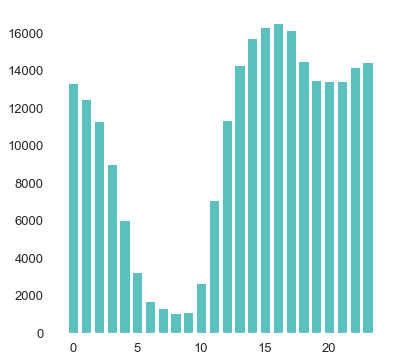

In [56]:
fig, ax = plt.subplots(figsize = (6,6))
plt.bar(data_tweet_hour.hour, data_tweet_hour.frequency,color="#5BC0BE") # plots the number of tweets with each day of the week
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
#plt.ylabel("frequency",size=14)
#plt.title("")
plt.show()

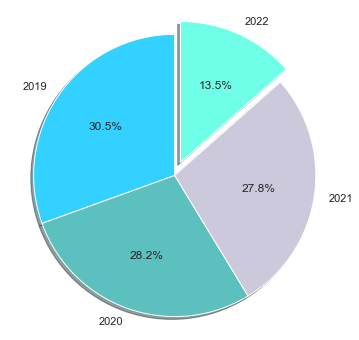

In [57]:
data_tweet_year['year']=data_tweet_year['year'].astype(str)
fig, ax = plt.subplots(figsize = (6,6))
explode=(0,0,0,0.1)
list_color=['#33D1FF','#5BC0BE','#CCC9DC','#6FFFE9']
plt.pie(data_tweet_year['frequency'],explode=explode,labels=data_tweet_year['year'],autopct='%1.1f%%',shadow=True, startangle=90,colors=list_color) # plots the number of tweets with each day of the week
ax.axis('equal')
# Later in the code
#ax.grid(False)
#ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
#plt.ylabel("frequency",size=14)
#plt.title("")
plt.show()

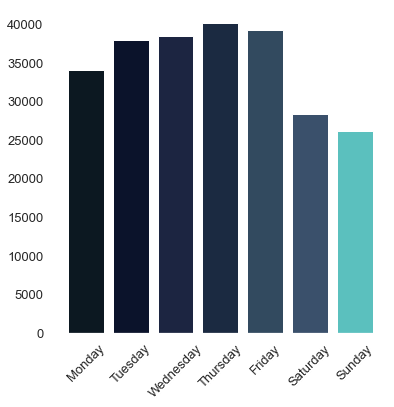

In [58]:
list_color=['#0C1821','#0B132B','#1C2541','#1B2A41','#324A5F','#3A506B','#5BC0BE','#CCC9DC','#6FFFE9']
list_week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data_tweet_day_of_week['day_of_week']=list_week
fig, ax = plt.subplots(figsize = (6,6))
plt.bar(data_tweet_day_of_week.day_of_week, data_tweet_day_of_week.frequency,color=list_color) # plots the number of tweets with each day of the week
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
#plt.ylabel("frequency",size=14)
plt.xticks(rotation=45)
#plt.title("")
plt.show()

### 2.4. Keyword

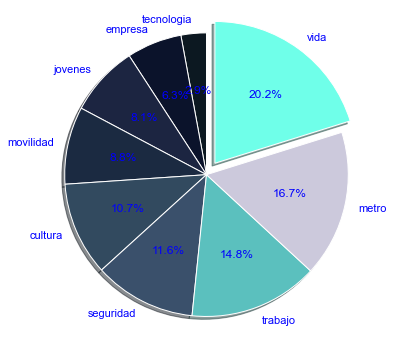

In [59]:
data_keyword=data_tweets.groupby(['key_word']).size().reset_index(name="frequency").sort_values(by="frequency") # shows the number of tweets with each day of the week
fig, ax = plt.subplots(figsize = (6,6))
list_color=['#0C1821','#0B132B','#1C2541','#1B2A41','#324A5F','#3A506B','#5BC0BE','#CCC9DC','#6FFFE9']
explode=(0,0,0,0,0,0,0,0,0.1)
plt.pie(data_keyword['frequency'],labels=data_keyword['key_word'],autopct='%1.1f%%',shadow=True, startangle=90,explode=explode,colors=list_color,textprops={"color":"blue"}) # plots the number of tweets with each day of the week
ax.axis('equal')
ax.tick_params(labelsize=13) 

plt.show()

In [60]:
data_keyword_year=data_tweets.groupby(['key_word','year']).size().reset_index(name="frequency").sort_values(by="frequency") # shows the number of tweets with each day of the week

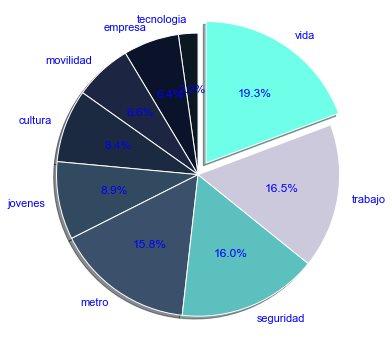

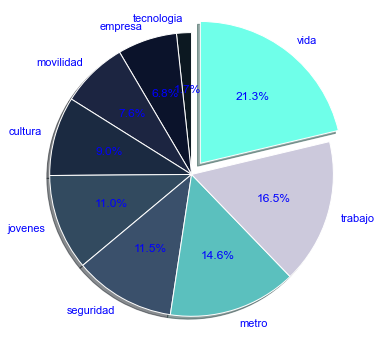

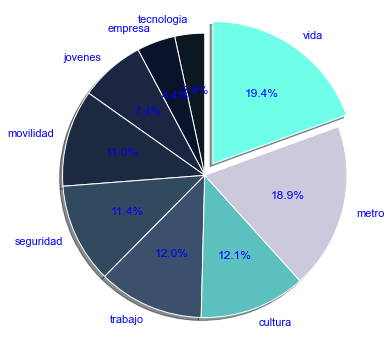

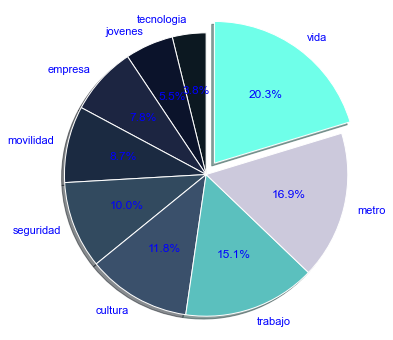

In [61]:
for year in data_keyword_year['year'].unique():
    fig, ax = plt.subplots(figsize = (6,6))
    list_color =list_color=['#0C1821','#0B132B','#1C2541','#1B2A41','#324A5F','#3A506B','#5BC0BE','#CCC9DC','#6FFFE9']
    explode=(0,0,0,0,0,0,0,0,0.1)
    plt.pie(data_keyword_year[data_keyword_year['year']==year]['frequency'],labels=data_keyword_year[data_keyword_year['year']==year]['key_word'],autopct='%1.1f%%',shadow=True, startangle=90,colors=list_color,textprops={'color':"blue"},explode=explode) # plots the number of tweets with each day of the week
    ax.axis('equal')
    ax.tick_params(labelsize=13) 
    plt.show()

In [62]:
data_tweets=data_tweets[['full_text','key_word','hour','day_of_week','month','year']]

In [63]:
data_tweets.to_csv('data/tweets_interim.csv',index=False)